## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Roy Dadon 5714
# student 2: Sahar Aviad 5843
# student 3: Gil Yona 8017
# student 4: David Saadia 3401
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
# Embarked - Location entry to ship - we can assume theres no order
# Pclass - First class/ business class etc.
# SibSp - Number of siblings / partners
# Parch - Number of parents or kids
# Fare - Ticket cost

In [3]:
#IMPORTS
import pandas as pd
import numpy as np 
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB as nb
from sklearn.model_selection import GridSearchCV as GridS, KFold, StratifiedKFold
from sklearn.feature_selection import SelectKBest, VarianceThreshold, r_regression as pearson
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading dataset
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
label = "Survived"

In [5]:
titanic_train.shape

(712, 8)

In [6]:
titanic_test.shape

(179, 8)

In [7]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [8]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [9]:
titanic_train.info()
print()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  

In [10]:
titanic_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


## Correlations and Visualisation
Checking all correlations with the target label "Survived". We will visualize the top 2 most correlated features 

In [11]:
X = titanic_train.copy().drop(labels = label, axis = 1)
y = titanic_train.copy()[label]

correlation = X.corrwith(y, axis = 0)
correlation = correlation.sort_values(ascending = False, key = lambda x: np.abs(x)).head(2)

correlation_pd = pd.DataFrame(correlation).T
correlation_pd.index = [label]
correlation_pd

,Sex,Pclass
Survived,-0.550699,-0.324024


We will show a heatmap of the correlation of each class.

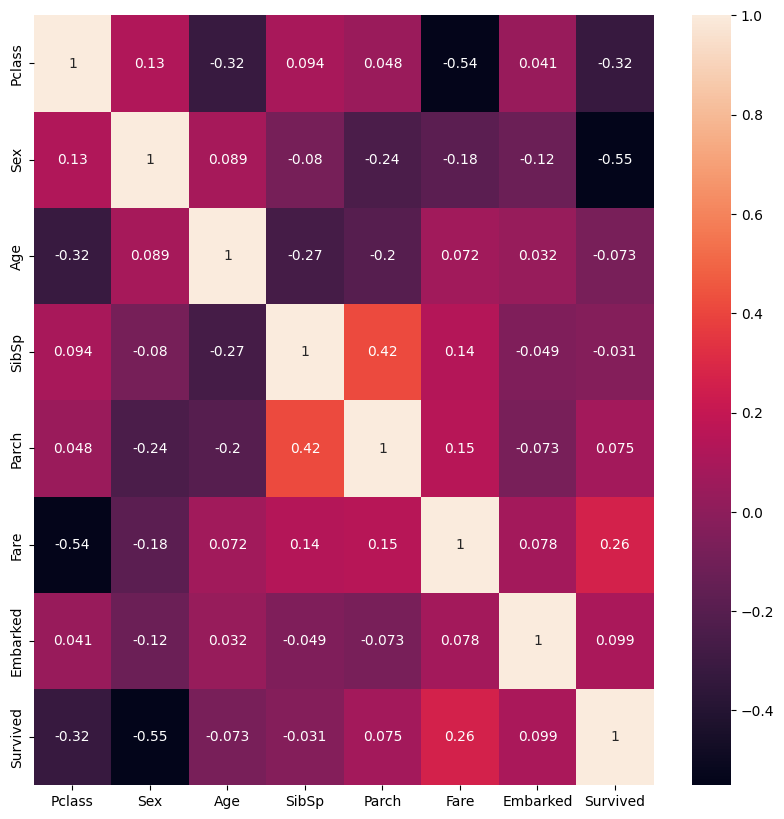

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(titanic_train.corr(), annot = True)
plt.show()

The features "Sex" and "Pclass" are the top 2 most correlated features with "Survived", therefore visualizing them will help us get info

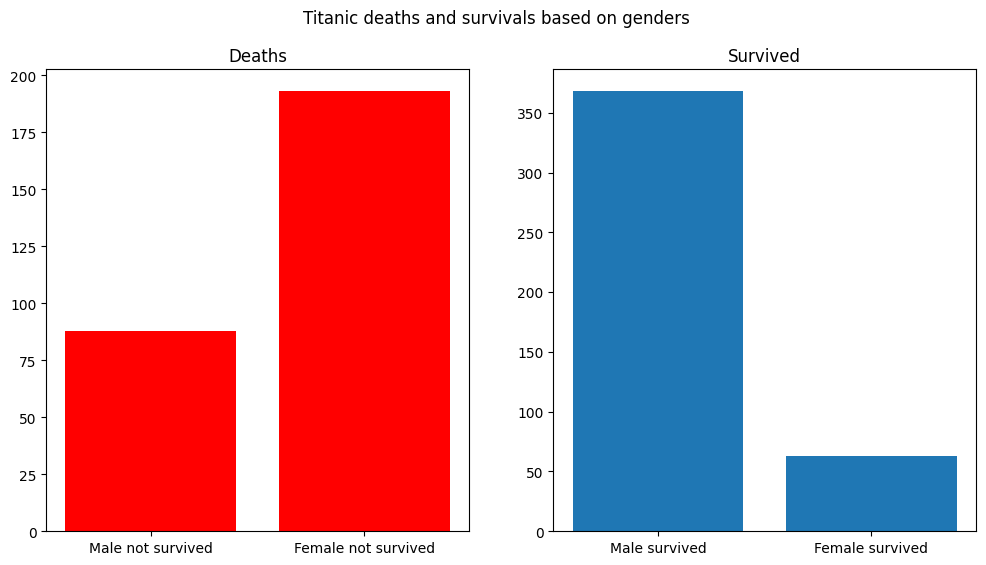

In [13]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
df_count = pd.DataFrame(titanic_train.value_counts(subset = ["Sex", label]))
count_list = list(df_count["count"])
count_list[0] , count_list[2] = count_list[2] , count_list[0]
x_labels = ["Male not survived", "Female not survived", "Male survived", "Female survived"]
ax[0].bar(x_labels[:2], count_list[:2], color = "red")
ax[0].set_title('Deaths')
ax[1].bar(x_labels[2:], count_list[2:])
fig.suptitle('Titanic deaths and survivals based on genders')
ax[1].set_title('Survived')
plt.show()

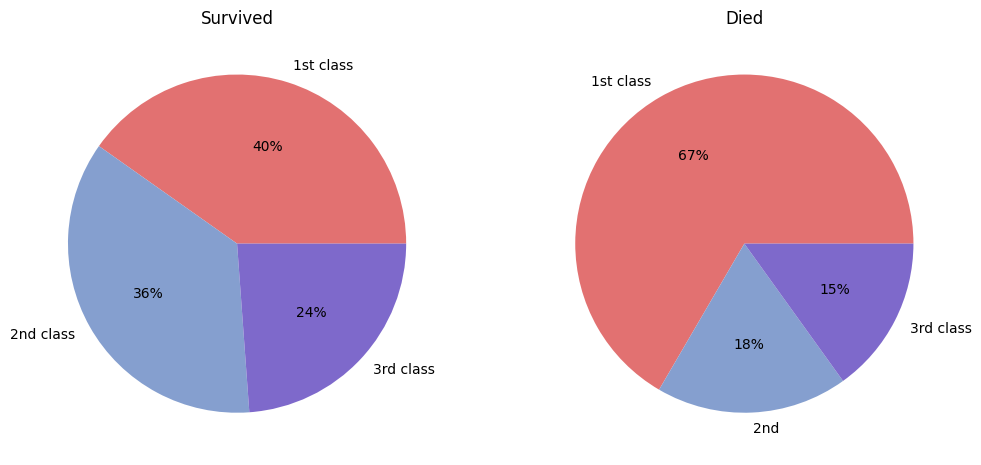

In [14]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
pallete_color= ["#e27171", "#859fcf", "#7e69cb"]	
surved = titanic_train[titanic_train[label] == 1]
notSurved = titanic_train[titanic_train[label] == 0]
ax[0].pie(surved["Pclass"].value_counts(), labels = ["1st class", "2nd class", "3rd class"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[1].pie(notSurved["Pclass"].value_counts(), labels = ["1st class", "2nd", "3rd class"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[0].set_title("Survived")
ax[1].set_title("Died")
plt.show()

People who were in first class weren't likely to survive.


We will also show a kernal density plot

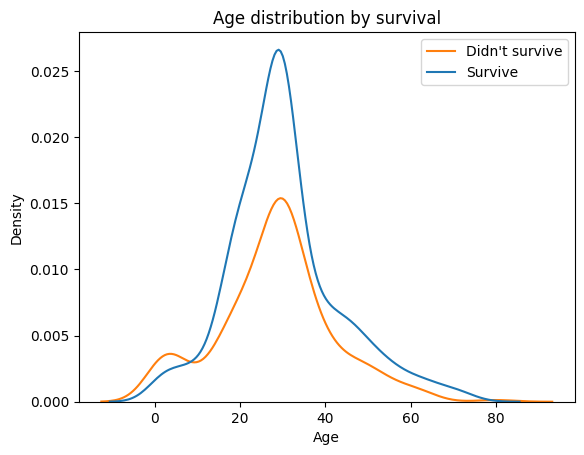

In [15]:
# correlation = X.corrwith(y, axis = 0)
# correlation = pd.DataFrame(correlation.sort_values(ascending = False, key = lambda x: np.abs(x))).T
# correlation.index = [label]
# correlation
# titanic_train
#ct = pd.crosstab(titanic_train[label], titanic_train["Age"])
df2 = titanic_train[[label, "Age"]]

k = sns.kdeplot(data = df2, x = "Age", hue = "Survived", common_norm = True)
k.legend(labels = ["Didn't survive", "Survive"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age distribution by survival")
plt.show()


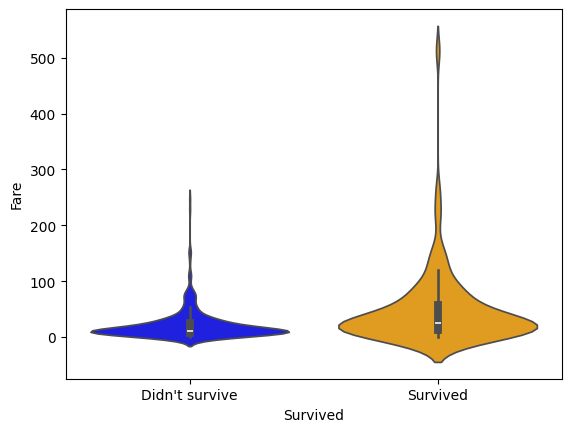

In [16]:
Violin= sns.violinplot(hue="Survived",x="Survived",legend=False,y="Fare", data=titanic_train, palette = ["blue", "orange"] )
xlabels = ["Didn't survive", "Survived"]
plt.xticks([0,1],xlabels)
plt.show()

We can see that the ticket price for the people who didn't survived are much lower!


## Learning - Experimenting
We will use 2 learning algorithms and use them on the test

In [17]:
train_copy = titanic_train.copy()
test_copy = titanic_test.copy()

model = KNN(n_neighbors=3, metric = "manhattan")

model.fit(train_copy.drop(label, axis = 1), train_copy[label])
y_predict = model.predict(test_copy.drop(label, axis = 1))

cm = confusion_matrix(test_copy[label], y_predict)
baseline_f1_knn = f1_score(test_copy[label], y_predict)
print("Estimated KNN base f1 score: ", baseline_f1_knn)

Estimated KNN base f1 score:  0.5666666666666667


In [18]:
train_copy = titanic_train.copy()
test_copy = titanic_test.copy()

model = MLPClassifier(max_iter = 2000, alpha = 0.001, hidden_layer_sizes = (20,))

model.fit(train_copy.drop(label, axis = 1), train_copy[label])
y_predict = model.predict(test_copy.drop(label, axis = 1))

cm = confusion_matrix(test_copy[label], y_predict)
baseline_f1_mlp = f1_score(test_copy[label], y_predict)
print("Estimated Neural Network base f1 score: ", baseline_f1_mlp)

Estimated Neural Network base f1 score:  0.717948717948718


In [19]:
train_copy = titanic_train.copy()
test_copy = titanic_test.copy()

model = nb(alpha = 0.9, fit_prior = False)

model.fit(train_copy.drop(label, axis = 1), train_copy[label])
y_predict = model.predict(test_copy.drop(label, axis = 1))

cm = confusion_matrix(test_copy[label], y_predict)
baseline_f1_nb = f1_score(test_copy[label], y_predict)
print("Estimated Naive bayes base f1 score: ", baseline_f1_nb)

Estimated Naive bayes base f1 score:  0.5242718446601942


In [20]:
train_copy = titanic_train.copy()
test_copy = titanic_test.copy()

model = gbc(n_estimators = 150, learning_rate = 0.09)

model.fit(train_copy.drop(label, axis = 1), train_copy[label])
y_predict = model.predict(test_copy.drop(label, axis = 1))

cm = confusion_matrix(test_copy[label], y_predict)
baseline_f1_gbc = f1_score(test_copy[label], y_predict)
print("Estimated gradient boosting base f1 score: ", baseline_f1_gbc)

Estimated gradient boosting base f1 score:  0.8173913043478261


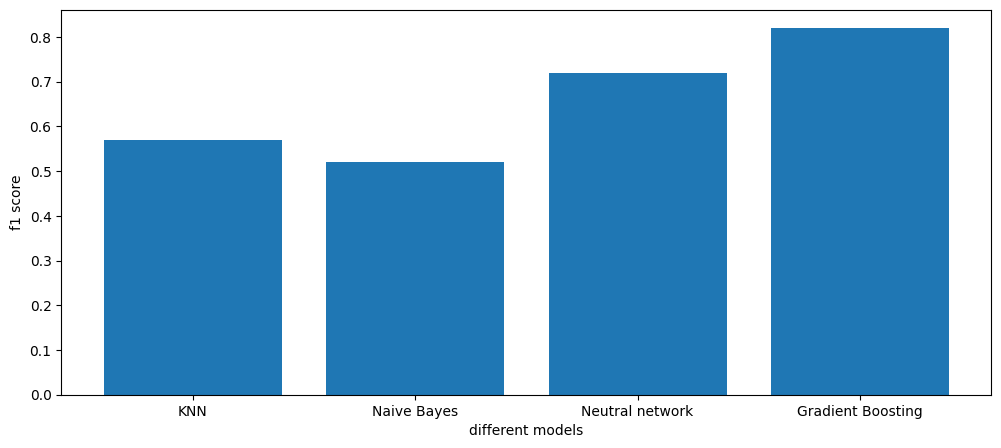

In [21]:
f1_arr_baseline = []

fig,ax = plt.subplots(figsize = (12,5))
f1_arr_baseline.append(round(baseline_f1_knn,2)) 
f1_arr_baseline.append(round(baseline_f1_nb,2))
f1_arr_baseline.append(round(baseline_f1_mlp,2))
f1_arr_baseline.append(round(baseline_f1_gbc,2))
f1_arr_baseline
labels = ["KNN", "Naive Bayes", "Neutral network", "Gradient Boosting"]
plt.bar(x = labels, height = f1_arr_baseline)
plt.xlabel("different models")
plt.ylabel("f1 score")
plt.show()

## Grid Search 5 fold: 
Let's create a Pipeline object that will help us run all the algorithms and choose the best.
## Let's start with KNN:

In [22]:
pipe = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('StandardScaler', StandardScaler()),
    ('KNN', KNN())
])

Now the parameters for each module. We will create a dictionary that determines all the combinations and permutations of the KNN learning algorithm.

In [23]:
params = {
    'KNN__n_neighbors':  range(1,14),
    'varianceThreshold__threshold': [0.0001, 0.01, 0.1, 0.2, 0.4, 0.5],
    'KBest__k': ['all'],
    'KNN__metric' : ['manhattan', 'euclidean',"minkowski"]
}

Now for the KFold object, that will create all the splits for the different training sets.

In [24]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

Last step: create the grid search and find out the best f1 score!

In [25]:
gridSearch = GridS(pipe, params, scoring='f1', cv=folds)
gridSearch.fit(titanic_train.drop(label, axis = 1), titanic_train[label])

best_model_KNN = gridSearch.best_estimator_
best_score_KNN = gridSearch.best_score_
best_params_KNN = gridSearch.best_params_

print("F1 best permutation score is: " ,best_score_KNN)

F1 best permutation score is:  0.749094017094017


F1 score for KNN is 0.74.. Pretty bad! Let's continue with Naive Bayes.
Let's do the same for 3 more algorithms.

## Naive Bayes:

In [26]:
pipe = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    ('NaiveBayes', nb())
])

params = {
    'NaiveBayes__alpha':  [0.002, 0.1, 0.5,0.9, 1.0, 2.0, 5.0, 10.0],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.01, 0.1, 0.2, 0.4, 0.5, 1e-2, 1e-1, 1, 10, 100],
    'NaiveBayes__force_alpha': [True, False],
    'NaiveBayes__fit_prior': [True, False]
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)
    
gridSearch = GridS(pipe, params, scoring='f1', cv=folds)
gridSearch.fit(titanic_train.drop(label, axis = 1), titanic_train[label])
best_model_NB = gridSearch.best_estimator_
best_score_NB = gridSearch.best_score_
best_params_NB = gridSearch.best_params_


print("F1 best permutation score is: " , best_score_NB)

F1 best permutation score is:  0.6887981013917


In [27]:
best_params_NB

{'KBest__k': 'all',
 'NaiveBayes__alpha': 0.5,
 'NaiveBayes__fit_prior': False,
 'NaiveBayes__force_alpha': True,
 'varianceThreshold__threshold': 0.01}

## Neural Network:

In [28]:
pipe = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    ('MLP', MLPClassifier(max_iter = 2000))
])

params = {
    'MLP__hidden_layer_sizes': [(50,), (100,), (200,)],
    'MLP__activation': ['tanh', 'relu'],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.01, 0.1]
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

gridSearch = GridS(pipe, params, scoring='f1', cv=folds)
gridSearch.fit(titanic_train.drop(label, axis=1), titanic_train[label])
best_model_NN = gridSearch.best_estimator_
best_score_NN = gridSearch.best_score_
best_params_NN = gridSearch.best_params_

print("F1 best permutation score is: ", best_score_NN)

F1 best permutation score is:  0.747640153100394


## Gradient Boosting:

In [29]:
pipe = Pipeline([
    ('varianceThreshold', VarianceThreshold()),
    ('KBest', SelectKBest()),
    ('MinMaxScaler', MinMaxScaler()),
    ('gbc', gbc())
])

params = {
    'gbc__n_estimators' : [150, 400],
    'gbc__learning_rate' : [0.09, 0.01, 0.2],
    'KBest__k': ['all'],
    'varianceThreshold__threshold': [0.001,0.01]
}

folds = KFold(n_splits=5, shuffle=True, random_state=42)

gridSearch = GridS(pipe, params, scoring='f1', cv=folds)
gridSearch.fit(titanic_train.drop(label, axis=1), titanic_train[label])
best_model_gbc = gridSearch.best_estimator_
best_score_gbc = gridSearch.best_score_
best_params_gbc = gridSearch.best_params_

print("F1 best permutation score is: ", best_score_gbc)


F1 best permutation score is:  0.7562957524040457


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)


Let's compare all the 5 fold permutations using a bar plot:

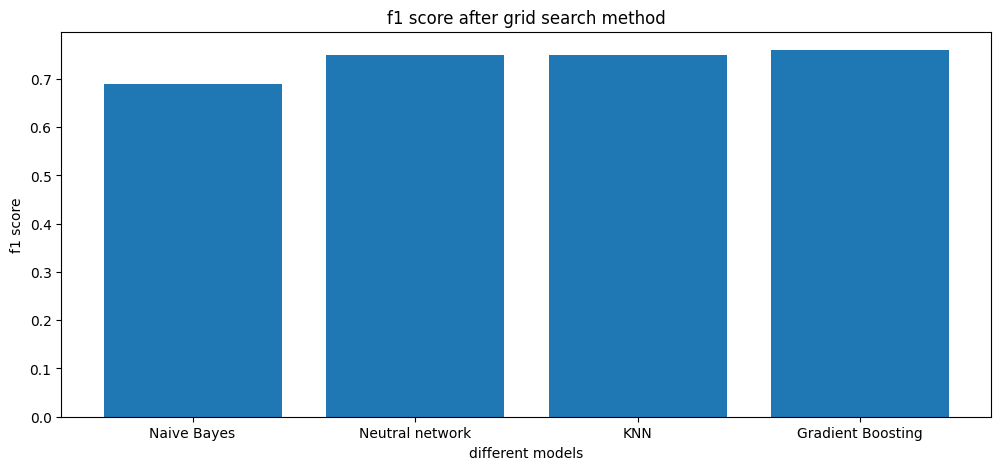

In [30]:
f1_arr = [round(best_score_NB,2), round(best_score_NN,2), round(best_score_KNN,2), round(best_score_gbc,2)]

fig,ax = plt.subplots(figsize = (12,5))

labels = ["Naive Bayes", "Neutral network", "KNN", "Gradient Boosting"]
plt.bar(x = labels, height = f1_arr)
plt.xlabel("different models")
plt.ylabel("f1 score")
plt.title("f1 score after grid search method")
plt.show()

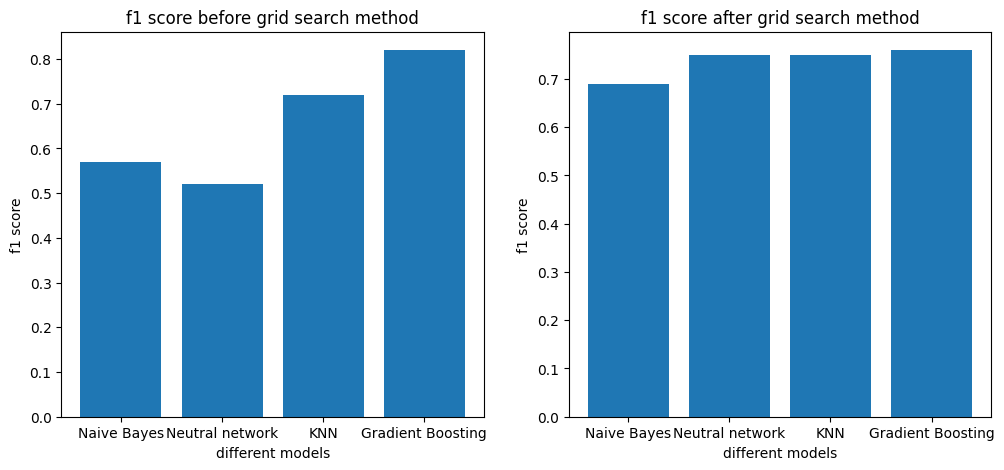

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
data1=f1_arr_baseline
data2=f1_arr
axs[0].bar(x=labels, height=data1, label='before grid search method') 
axs[1].bar(x=labels, height=data2, label='after grid search method')
axs[0].set_xlabel('different models')  # Set label for first subplot
axs[1].set_xlabel('different models')
axs[0].set_ylabel('f1 score')  # Set label for first subplot
axs[1].set_ylabel('f1 score')
axs[0].set_title('f1 score before grid search method')
axs[1].set_title('f1 score after grid search method')
plt.show()

Gradient boosting got the best result! We will also show a DataFrame of the best f1 score with the algorithms.

In [32]:
comparison_dictionary = {
    'KNN' : best_params_KNN,
    'Naive Bayes' : best_params_NB,
    'Neural Network' : best_params_NN,
    'Gradient Boosting' : best_params_gbc,
}
df = pd.DataFrame(comparison_dictionary)
df.fillna("-", inplace = True)
df = df.T
df["F1"] = [best_score_KNN, best_score_NB, best_score_NN, best_score_gbc]
df.sort_values(by = ["F1"], inplace = True, ascending = False)
df

,KBest__k,KNN__metric,KNN__n_neighbors,varianceThreshold__threshold,NaiveBayes__alpha,NaiveBayes__fit_prior,NaiveBayes__force_alpha,MLP__activation,MLP__hidden_layer_sizes,gbc__learning_rate,gbc__n_estimators,F1
Gradient Boosting,all,-,-,0.001,-,-,-,-,-,0.09,150,0.756296
KNN,all,manhattan,13,0.0001,-,-,-,-,-,-,-,0.749094
Neural Network,all,-,-,0.1,-,-,-,relu,"(50,)",-,-,0.747640
Naive Bayes,all,-,-,0.01,0.5,False,True,-,-,-,-,0.688798


## Best model
We can see from the table that Gradient Boosting has the best F1 score, so we will choose this model for part 4.

In [33]:
selected_model = best_model_gbc

## Part 4 - Apply on test and show model performance estimation

In [34]:
selected_model.fit(titanic_train.drop(label, axis = 1), titanic_train[label])
y_predict = selected_model.predict(titanic_test.drop(label, axis = 1))

cm = confusion_matrix(titanic_test[label], y_predict)
best_f1 = f1_score(titanic_test[label], y_predict)

cm_df = pd.DataFrame(cm)
cm_df.index = cm_df.columns = ["True", "False"]
print("Confusion Matrix for Selected Model, F1 score of: ", best_f1)
cm_df

Confusion Matrix for Selected Model, F1 score of:  0.8245614035087719


,True,False
True,112,6
False,14,47


In [35]:
report = classification_report(titanic_test[label], y_predict,output_dict=True)
df_report=pd.DataFrame(report)
df_report.transpose()

,precision,recall,f1-score,support
0,0.888889,0.949153,0.918033,118.000000
1,0.886792,0.770492,0.824561,61.000000
accuracy,0.888268,0.888268,0.888268,0.888268
macro avg,0.887841,0.859822,0.871297,179.000000
weighted avg,0.888174,0.888268,0.886179,179.000000


In [36]:
pred_df = titanic_test.copy()
pred_df["Survived Prediction"] = y_predict
pred_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Survived Prediction
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1
